In [0]:
# !curl https://s3.amazonaws.com/content.udacity-data.com/courses/nd188/flower_data.zip -o flower_data.zip
# !mkdir -p flower
# !unzip flower_data.zip -d flower
# !wget -cq https://github.com/udacity/pytorch_challenge/raw/master/cat_to_name.json -o flower/flower_datacat_to_name.json

In [0]:
# !mv cat_to_name.json flower/flower_data/

In [0]:
from fastai.vision import *
import json

In [4]:
path = Path('flower/flower_data')
path.ls()

[PosixPath('flower/flower_data/train'),
 PosixPath('flower/flower_data/cat_to_name.json'),
 PosixPath('flower/flower_data/valid')]

In [5]:
files = (path/'valid').ls()
files[:4]

[PosixPath('flower/flower_data/valid/94'),
 PosixPath('flower/flower_data/valid/90'),
 PosixPath('flower/flower_data/valid/50'),
 PosixPath('flower/flower_data/valid/67')]

In [0]:
with open(path/'cat_to_name.json', 'r') as f:
    label_map = json.load(f)

In [0]:
sz=224
bs=64

In [0]:
def foo(path, **kwargs):
    cl = path.parent.stem
    return label_map[cl]

In [0]:
src = (ImageList.from_folder(path)
       .split_by_folder(train='train', valid='valid')
       .label_from_func(func=foo)
       )

data = (src.transform(get_transforms(), size=224)
       .databunch(bs=bs)
       .normalize(imagenet_stats))

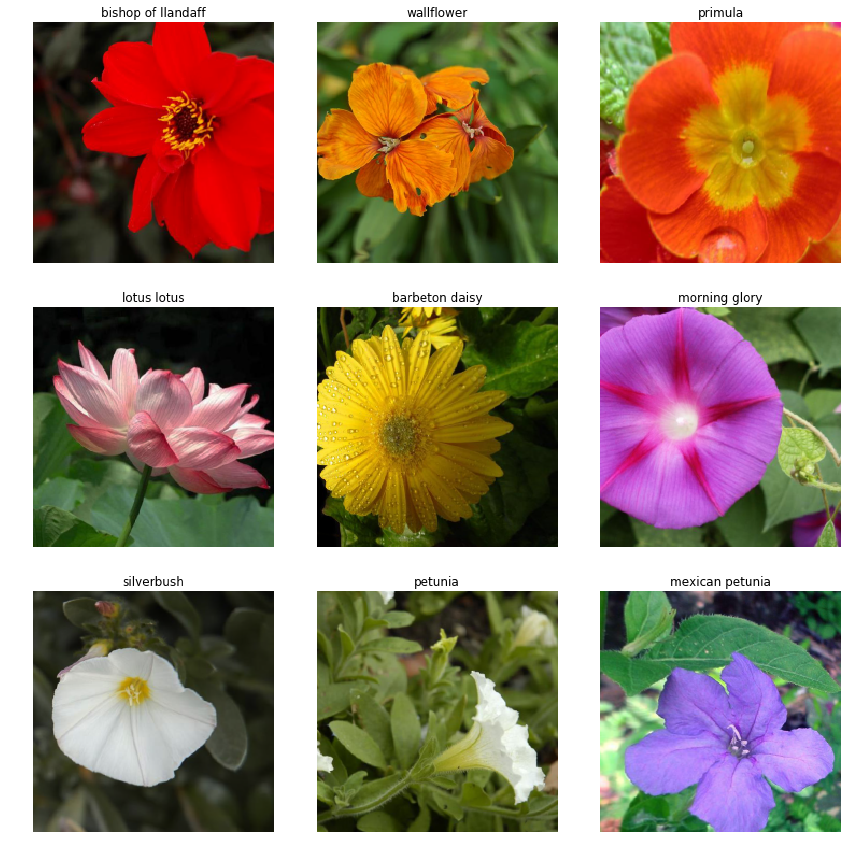

In [10]:
data.show_batch(rows=3)

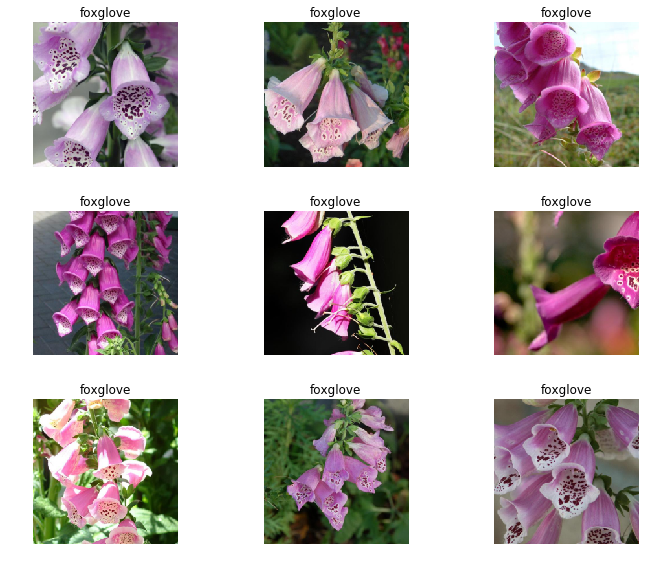

In [11]:
data.show_batch(rows=3, ds_type=DatasetType.Valid, figsize=(10, 8))

In [12]:
learn = cnn_learner(data, models.resnet101, metrics=accuracy, bn_final=True)

Downloading: "https://download.pytorch.org/models/resnet101-5d3b4d8f.pth" to /root/.cache/torch/checkpoints/resnet101-5d3b4d8f.pth
100%|██████████| 178728960/178728960 [00:01<00:00, 153681938.68it/s]


In [13]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


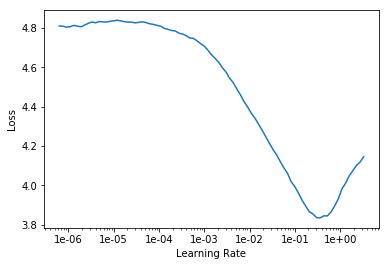

In [14]:
learn.recorder.plot()

In [15]:
learn.fit_one_cycle(5, 1e-2)

epoch,train_loss,valid_loss,accuracy,time
0,2.851894,1.511736,0.776284,03:13
1,1.503926,0.759386,0.816626,03:12
2,0.843538,0.346370,0.929095,03:11
3,0.519224,0.157997,0.965770,03:13
4,0.347158,0.126519,0.977995,03:13


In [0]:
learn.save('stage-1')

In [0]:
intp = ClassificationInterpretation.from_learner(learn)

In [18]:
losses, idxs = intp.top_losses()

len(data.valid_ds) == len(losses) == len(idxs)

True

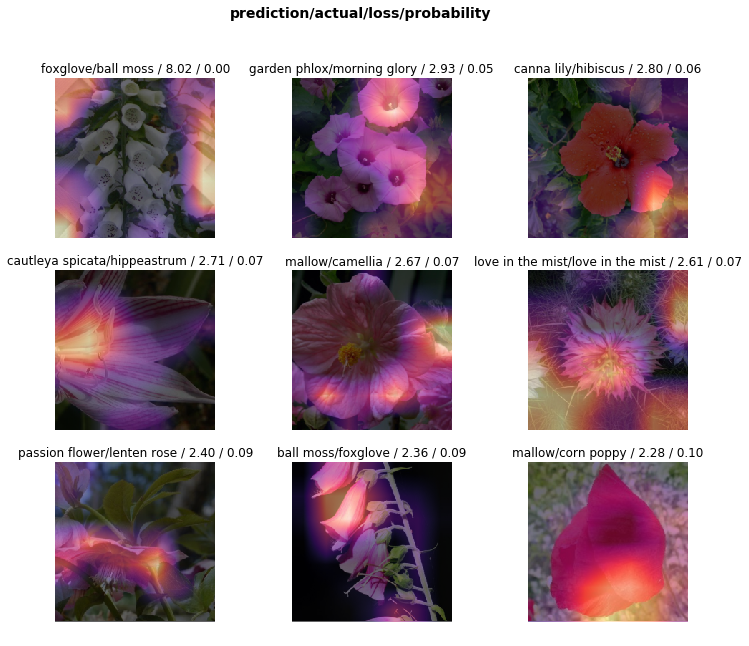

In [19]:
intp.plot_top_losses(9, figsize=(12,10))

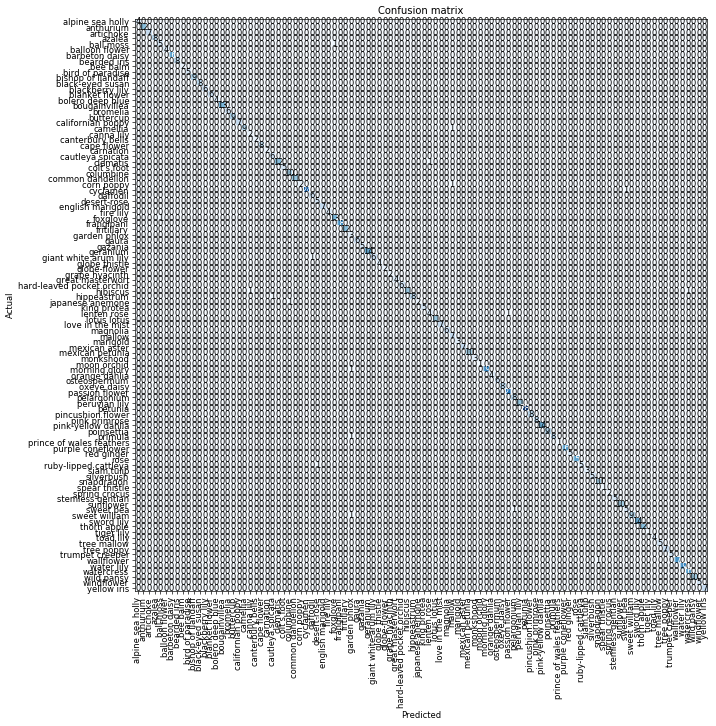

In [20]:
intp.plot_confusion_matrix(figsize=(12,12), dpi=60)

In [21]:
intp.most_confused(min_val=1)

[('ball moss', 'foxglove', 1),
 ('camellia', 'mallow', 1),
 ('clematis', 'lenten rose', 1),
 ('corn poppy', 'mallow', 1),
 ('cyclamen', 'sweet pea', 1),
 ('foxglove', 'ball moss', 1),
 ('giant white arum lily', 'daffodil', 1),
 ('hibiscus', 'canna lily', 1),
 ('hibiscus', 'watercress', 1),
 ('hippeastrum', 'cautleya spicata', 1),
 ('japanese anemone', 'columbine', 1),
 ('lenten rose', 'passion flower', 1),
 ('morning glory', 'garden phlox', 1),
 ('primula', 'garden phlox', 1),
 ('ruby-lipped cattleya', 'desert-rose', 1),
 ('sweet pea', 'pelargonium', 1),
 ('sweet william', 'garden phlox', 1),
 ('wallflower', 'snapdragon', 1)]

In [0]:
learn.unfreeze()

In [23]:
learn.fit_one_cycle(4, max_lr=slice(1e-5, 1e-3))

epoch,train_loss,valid_loss,accuracy,time
0,0.355018,0.264682,0.949878,03:19
1,0.368263,0.155150,0.971883,03:21
2,0.288086,0.101423,0.980440,03:22
3,0.234451,0.091270,0.986553,03:21


In [0]:
learn.save('stage-2');

In [0]:
learn.freeze()

In [26]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


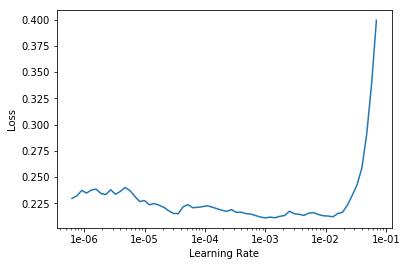

In [27]:
learn.recorder.plot()

In [28]:
learn.fit_one_cycle(6, slice(3e-3))

epoch,train_loss,valid_loss,accuracy,time
0,0.200238,0.087533,0.986553,03:10
1,0.197445,0.084267,0.981663,03:11
2,0.173058,0.084782,0.986553,03:12
3,0.150276,0.071581,0.987775,03:11
4,0.126062,0.068296,0.987775,03:12
5,0.117811,0.064988,0.987775,03:11


In [0]:
interp = ClassificationInterpretation.from_learner(learn)
loss, idxs = interp.top_losses()

In [30]:
intp.most_confused(min_val=1)

[('ball moss', 'foxglove', 1),
 ('camellia', 'mallow', 1),
 ('clematis', 'lenten rose', 1),
 ('corn poppy', 'mallow', 1),
 ('cyclamen', 'sweet pea', 1),
 ('foxglove', 'ball moss', 1),
 ('giant white arum lily', 'daffodil', 1),
 ('hibiscus', 'canna lily', 1),
 ('hibiscus', 'watercress', 1),
 ('hippeastrum', 'cautleya spicata', 1),
 ('japanese anemone', 'columbine', 1),
 ('lenten rose', 'passion flower', 1),
 ('morning glory', 'garden phlox', 1),
 ('primula', 'garden phlox', 1),
 ('ruby-lipped cattleya', 'desert-rose', 1),
 ('sweet pea', 'pelargonium', 1),
 ('sweet william', 'garden phlox', 1),
 ('wallflower', 'snapdragon', 1)]

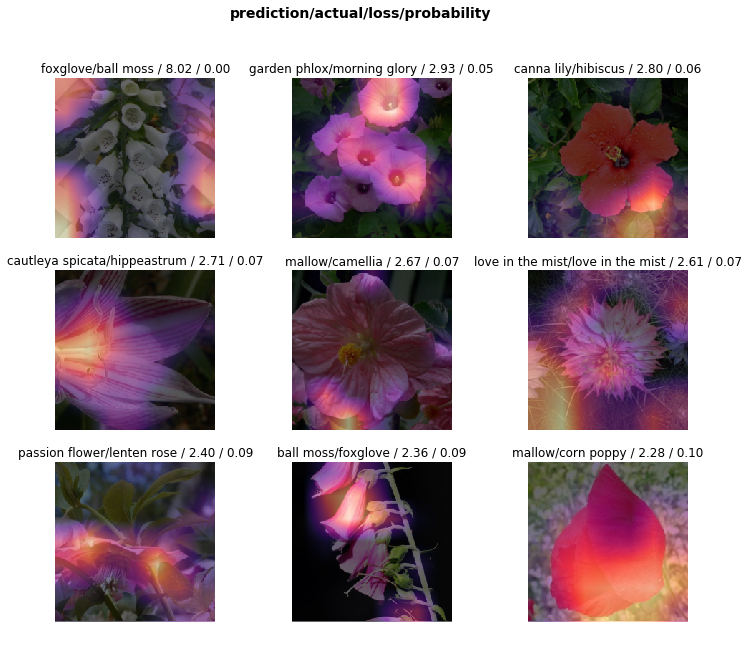

In [31]:
intp.plot_top_losses(9, figsize=(12,10))

In [0]:
tfms = get_transforms(max_rotate=20, max_zoom=1.3, max_lighting=0.4, max_warp=0.4,
                      p_affine=1., p_lighting=1.)

In [0]:
src = (ImageList.from_folder(path)
       .split_by_folder(train='train', valid='valid')
       .label_from_func(func=foo)
       )


In [0]:
def get_data(size, bs, padding_mode='reflection'):
    return (src.transform(tfms, size=size, padding_mode=padding_mode)
            .databunch(bs=bs).normalize(imagenet_stats))

In [0]:
data = get_data(224, bs)

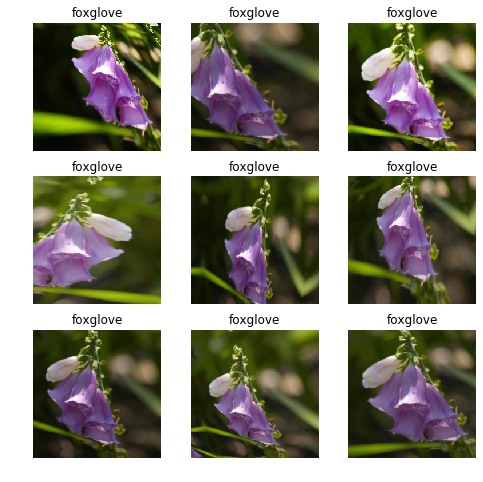

In [38]:
def _plot(i, j, ax):
    x, y = data.train_ds[3]
    x.show(ax, y=y)
    
plot_multi(_plot, 3, 3, figsize=(8,8))

In [0]:
map_label = dict([(value, key) for key, value in label_map.items()])

In [44]:
map_label['ball moss']

'93'

In [0]:
def get_image_list(img_name):
    id = map_label[img_name]
    return get_image_files(path/'train'/id)

In [0]:
files = get_image_list('ball moss')

In [0]:
fig, ax = plt.subplots(2, 4, figsize=(10, 8))

In [0]:
open_image(files[0]).apply_tfms(tfms[0]).show(figsize=(4, 4)), open_image(files[0]).apply_tfms(tfms[1]).show(figsize=(4, 4))

In [59]:
tfms

([RandTransform(tfm=TfmCrop (crop_pad), kwargs={'row_pct': (0, 1), 'col_pct': (0, 1), 'padding_mode': 'reflection'}, p=1.0, resolved={'row_pct': 0.8331449512153893, 'col_pct': 0.2701922480855371, 'padding_mode': 'reflection'}, do_run=True, is_random=True, use_on_y=True),
  RandTransform(tfm=TfmPixel (flip_lr), kwargs={}, p=0.5, resolved={}, do_run=False, is_random=True, use_on_y=True),
  RandTransform(tfm=TfmCoord (symmetric_warp), kwargs={'magnitude': (-0.4, 0.4)}, p=1.0, resolved={'magnitude': tensor([-0.2357, -0.3864,  0.3223, -0.1071]), 'invert': False}, do_run=True, is_random=True, use_on_y=True),
  RandTransform(tfm=TfmAffine (rotate), kwargs={'degrees': (-20, 20)}, p=1.0, resolved={'degrees': -15.18088523780715}, do_run=True, is_random=True, use_on_y=True),
  RandTransform(tfm=TfmAffine (zoom), kwargs={'scale': (1.0, 1.3), 'row_pct': (0, 1), 'col_pct': (0, 1)}, p=1.0, resolved={'scale': 1.041724081534815, 'row_pct': 0.46839326990291785, 'col_pct': 0.8691115084112377}, do_run=Tru